In [2]:
#Load libs
from __future__ import division, print_function, unicode_literals
import math
import numpy as np 
import matplotlib.pyplot as plt

Solution found by formula: w =  [[4.00316114 2.98307273]]


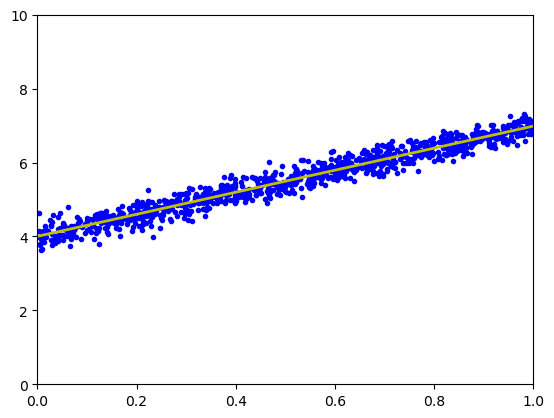

In [4]:
#ramdom data
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added 4 + 3x + noise

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w_lr.T)

# Display result
w = w_lr
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 2)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

In [8]:
# gradient of 
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

# cost function
def cost(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2;

# draw the cost function
def numerical_grad(w, cost):
    eps = 1e-4
    g = np.zeros_like(w)
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps 
        w_n[i] -= eps
        g[i] = (cost(w_p) - cost(w_n))/(2*eps)
    return g

def check_grad(w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(w)
    grad2 = numerical_grad(w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False

print('Checking gradient...', check_grad(np.random.rand(2, 1), cost, grad))
# draw the cost function

Checking gradient... True


In [11]:
# check convergence
def has_converged(theta_new, grad):
    return np.linalg.norm(grad(theta_new))/len(theta_new) < 1e-3

def GD_momentum(theta_init, grad, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if has_converged(theta_new, grad):
            break 
        theta.append(theta_new)
        v_old = v_new
    return theta 
    
# run gradient descent
eta = .05
theta_init = np.array([[2], [1]])
theta = GD_momentum(theta_init, grad, eta, .9)
print('Solution found by GD: w = ', theta[-1].T, ',\nafter %d iterations.' %(len(theta)))

Solution found by GD: w =  [[4.01073062 2.97745966]] ,
after 93 iterations.


In [12]:
# simulate for stochastic gradient descent
# single point gradient
def sgrad(w, i, rd_id):
    true_i = rd_id[i]
    xi = Xbar[true_i, :]
    yi = y[true_i]
    a = np.dot(xi, w) - yi
    return (xi*a).reshape(2, 1)

def SGD(w_init, grad, eta):
    w = [w_init]
    w_last_check = w_init
    iter_check_w = 10
    N = X.shape[0]
    count = 0
    for it in range(10):
        # shuffle data 
        rd_id = np.random.permutation(N)
        for i in range(N):
            count += 1 
            g = sgrad(w[-1], i, rd_id)
            w_new = w[-1] - eta*g
            w.append(w_new)
            if count%iter_check_w == 0:
                w_this_check = w_new                 
                if np.linalg.norm(w_this_check - w_last_check)/len(w_init) < 1e-3:                                    
                    return w
                w_last_check = w_this_check
    return w

# run SGD
w_init = np.array([[2], [1]])
w = SGD(w_init, grad, 1)
print('Solution found by SGD: w = ', w[-1].T, ',\nafter %d iterations.' %(len(w)))


Solution found by SGD: w =  [[3.54778796 2.49952631]] ,
after 10001 iterations.
